# Cotton Disease Prediction

In [1]:
# Importing Required Libraries
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
%matplotlib inline 

### Preprocessing

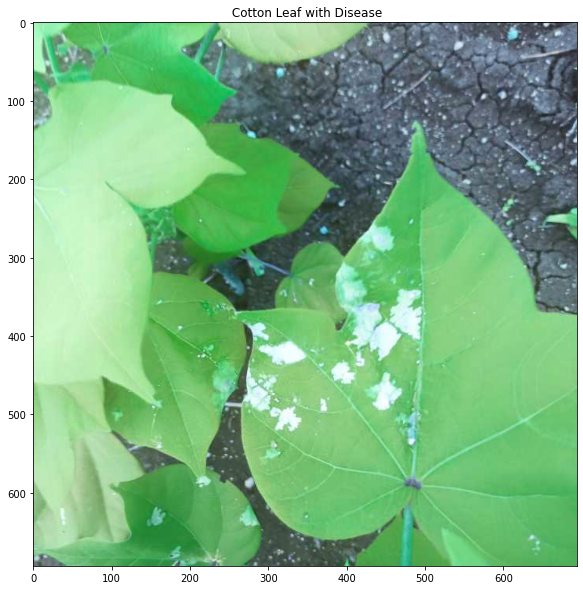

In [2]:
image = cv2.imread('../input/cotton-disease-dataset/Cotton Disease/train/diseased cotton leaf/dis_leaf (101)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Cotton Leaf with Disease')
plt.imshow(image)

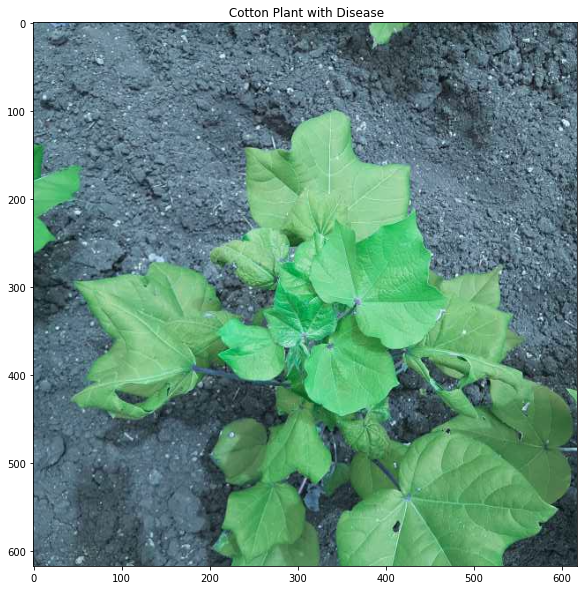

In [3]:
image = cv2.imread('../input/cotton-disease-dataset/Cotton Disease/train/diseased cotton plant/dd (104)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Cotton Plant with Disease')
plt.imshow(image)

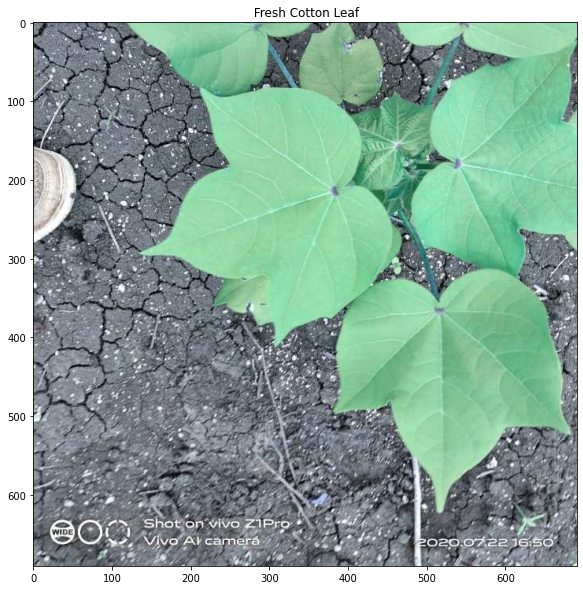

In [4]:
image = cv2.imread('../input/cotton-disease-dataset/Cotton Disease/train/fresh cotton leaf/d (100)_iaip.jpg')
type(image)
plt.figure(figsize=(10,10)) 
plt.title(' Fresh Cotton Leaf')
plt.imshow(image)

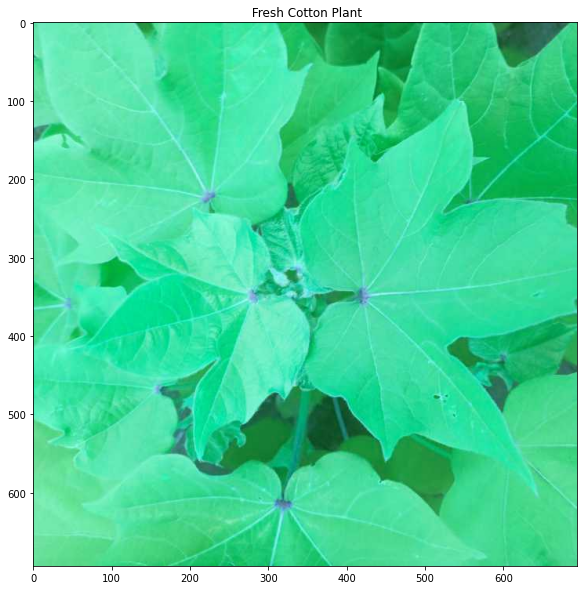

In [5]:
image = cv2.imread('../input/cotton-disease-dataset/Cotton Disease/train/fresh cotton plant/dsd (143)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Fresh Cotton Plant')
plt.imshow(image)

In [6]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [7]:
train_data = train_datagenerator.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/train',
                                                    target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
test_data = test_datagenerator.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/val',
                                                  target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


### Building Model

In [8]:
# CNN Model
cnn = tf.keras.models.Sequential()
# Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#flaterning
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [9]:
# Compiling the CNN
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = train_data, validation_data = test_data, epochs = 10)

Epoch 1/10
61/61 [==============================] - 76s 1s/step - loss: 1.3314 - accuracy: 0.4140 - val_loss: 1.2307 - val_accuracy: 0.3913
Epoch 2/10
61/61 [==============================] - 51s 834ms/step - loss: 1.1542 - accuracy: 0.5000 - val_loss: 0.9503 - val_accuracy: 0.6087
Epoch 3/10
61/61 [==============================] - 51s 835ms/step - loss: 0.9856 - accuracy: 0.6118 - val_loss: 0.8217 - val_accuracy: 0.6324
Epoch 4/10
61/61 [==============================] - 52s 852ms/step - loss: 0.8590 - accuracy: 0.6405 - val_loss: 0.6241 - val_accuracy: 0.7866
Epoch 5/10
61/61 [==============================] - 50s 826ms/step - loss: 0.7665 - accuracy: 0.6850 - val_loss: 0.6614 - val_accuracy: 0.7075
Epoch 6/10
61/61 [==============================] - 50s 827ms/step - loss: 0.7162 - accuracy: 0.7075 - val_loss: 0.7135 - val_accuracy: 0.7036
Epoch 7/10
61/61 [==============================] - 50s 816ms/step - loss: 0.7003 - accuracy: 0.7315 - val_loss: 0.5843 - val_accuracy: 0.8024
Ep

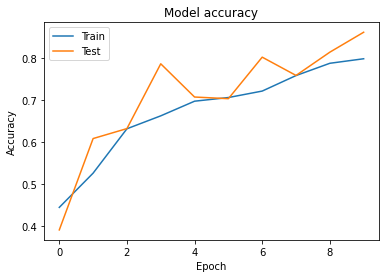

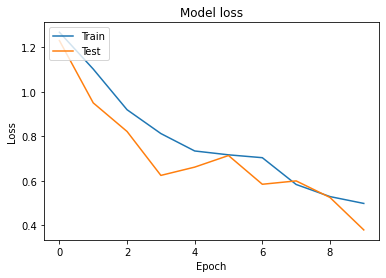

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

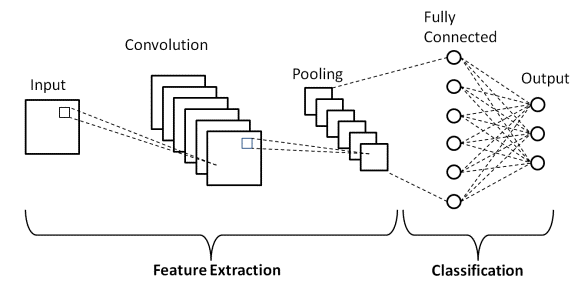

## Transfer Learning

### VGG16

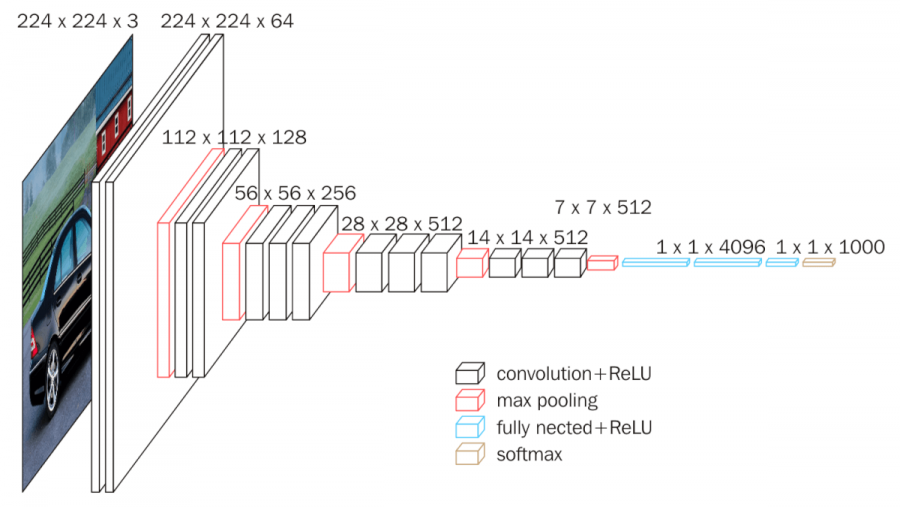!

In [12]:
from keras.applications.vgg16 import VGG16

In [13]:
IMAGE_SIZE = [224, 224]
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [14]:
for layer in vgg16.layers:
    layer.trainable = False

In [15]:
folders = glob('/kaggle/input/cotton-disease-dataset/Cotton Disease/train/*')


In [16]:
    x = Flatten()(vgg16.output)

In [17]:
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
# Compile the Model
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [20]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [22]:
test_set = test_datagen.flow_from_directory('/kaggle/input/cotton-disease-dataset/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [23]:
# Fit the model
r = model.fit_generator( training_set,
                         validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                         validation_steps=len(test_set))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 45s 714ms/step - loss: 1.1052 - accuracy: 0.6356 - val_loss: 0.4810 - val_accuracy: 0.8208
Epoch 2/20
61/61 [==============================] - 41s 666ms/step - loss: 0.3104 - accuracy: 0.8741 - val_loss: 0.1810 - val_accuracy: 0.9528
Epoch 3/20
61/61 [==============================] - 40s 657ms/step - loss: 0.1670 - accuracy: 0.9461 - val_loss: 0.1790 - val_accuracy: 0.9528
Epoch 4/20
61/61 [==============================] - 40s 654ms/step - loss: 0.1733 - accuracy: 0.9346 - val_loss: 0.1795 - val_accuracy: 0.9528
Epoch 5/20
61/61 [==============================] - 41s 665ms/step - loss: 0.1355 - accuracy: 0.9504 - val_loss: 0.1357 - val_accuracy: 0.9528
Epoch 6/20
61/61 [==============================] - 40s 658ms/step - loss: 0.0992 - accuracy: 0.9705 - val_loss: 0.1208 - val_accuracy: 0.9528
Epoch 7/20
61/61 [==============================] - 41s 671ms/step - loss: 0.0964 - accuracy: 0.9667 - val_loss: 0.1282 - val_accuracy: 0.9340

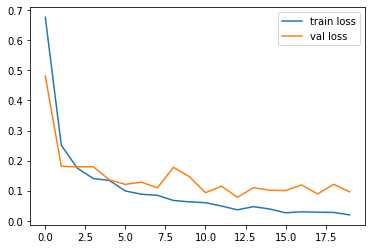

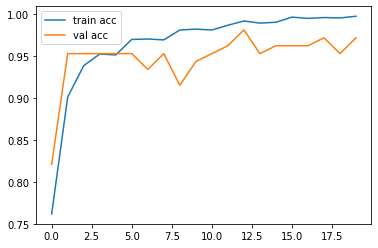

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


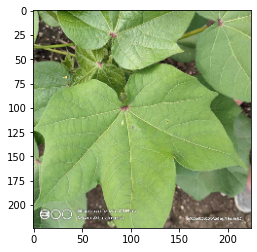

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('../input/cotton-disease-dataset/Cotton Disease/test/fresh cotton leaf/d (133)_iaip.jpg', target_size = (224, 224))
imgplot = plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
preds = model.predict(test_image)

In [26]:
preds

array([[9.5500025e-07, 2.3048684e-10, 9.9999905e-01, 1.2096513e-10]],
      dtype=float32)

In [27]:
preds = np.argmax(preds, axis=1)

In [28]:
if preds==0:
  print("The leaf is diseased cotton leaf")
elif preds==1:
  print("The leaf is diseased cotton plant")
elif preds==2:
  print("The leaf is fresh cotton leaf")
else:
  print("The leaf is fresh cotton plant")


The leaf is fresh cotton leaf
